# Homework 1

#software packages used in this homework

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import eval_legendre
import scipy

# Exercise 1

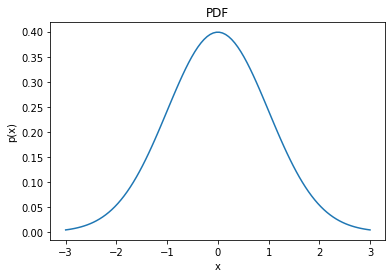

In [2]:
#1.a
x = np.linspace(-3,3,100)
mu=0
sigma=1
pdf_x = (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))
fig1,ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')
ax1.set_title('PDF')
ax1.plot(x,pdf_x)
plt.show()

mean: -0.045256707490195384
standard deviation: 0.9870331586690257


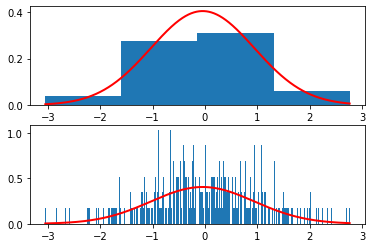

In [3]:
#1.b
np.random.seed(0) #fixed seed to ensure constant result
fig2,ax2 = plt.subplots(2,1)
#1.b-i
sample = np.random.normal(mu,sigma,1000)
#1.b-ii
mu_1,sig_1 = norm.fit(sample)
y_value = norm(mu_1, sig_1)
#1.b-iii
x = np.linspace(min(sample),max(sample), 1000)
ax2[0].hist(sample,4,density=True)
ax2[1].hist(sample,1000,density=True)
#1.b-iv
ax2[0].plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
ax2[1].plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
print("mean: {}".format(mu_1))
print("standard deviation: {}".format(sig_1))
plt.show()

#1.b-v (Optional)
These two histograms are not representative of the data distibution. One of them has too few bins(4), the other one has too many bins(1000). They can't reflect the distribution of the data accurately.

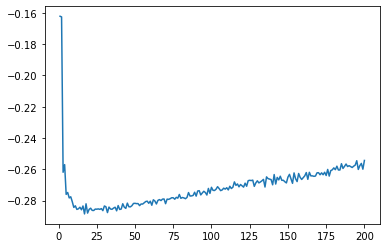

In [4]:
#1.c-i
mu=0
sigma=1
sample_num=1000
sample = np.random.normal(mu,sigma,sample_num)
J_h=[]
for m in range(1,201):
    hist, edge = np.histogram(sample,m,density=True)
    bin_width = edge[1] - edge[0]
    h = (max(sample) - min(sample))/m
    sum_p=0
    for each_p in hist:
        sum_p += (each_p*bin_width)**2
    J_hat_h = 2/(h*(sample_num-1)) - ((sample_num+1)/(h*(sample_num-1)))*sum_p
    J_h.append(J_hat_h)
fig3,ax3 = plt.subplots()
ax3.plot(np.linspace(1,200,200),J_h)

In [5]:
#1.c-ii
m_star = J_h.index(min(J_h))
print(m_star)

16


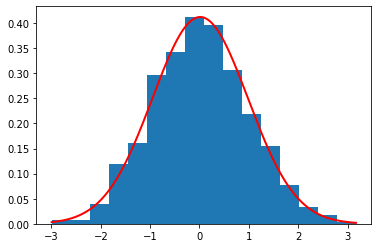

In [6]:
#1.c-iii
fig4,ax0 = plt.subplots()
ax0.hist(sample,m_star,density=True)

x = np.linspace(min(sample),max(sample), 1000)
mu_3,sig_3 = norm.fit(sample)
y_value = norm(mu_3, sig_3)
ax0.plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
plt.show()

# Exercise 2

#2.a-i 

The simplified expression is shown below:

$f_{x}(x) = \frac{1}{\sqrt{(2\pi)^{2}|\Sigma|}}e^{\frac{-1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)}$

$|\Sigma| = |\begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}|  = 3, \mu = \begin{bmatrix}2 \\6 \end{bmatrix}, \Sigma^{-1} = \begin{bmatrix} \frac{2}{3} & \frac{-1}{3} \\ \frac{-1}{3} &\frac{2}{3} \end{bmatrix}$

$f_{x}(x) = \frac{1}{\sqrt{12\pi^{2}}} e^{-\frac{x_{1}^{2}+2x_{1}-x_{1}x_{2}+x_{2}^{2}+28-10x_{2}}{3}}$



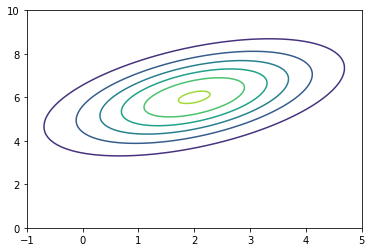

In [7]:
#2-a-ii
def f(x1,x2):
    return (1/np.sqrt(12*((np.pi)**2)))*np.exp(-(((x1**2)/3)+((x2**2)/3)+(2*x1/3)-(10*x2/3)-(x1*x2/3)+(28/3)))

x1=np.linspace(-1,5,100)
x2=np.linspace(0,10,100)
X,Y=np.meshgrid(x1,x2)
Z=f(X,Y)
plt.contour(X,Y,Z)
plt.show()



#2-b-i

$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[AX+b] = \mathbb{E}[AX]+\mathbb{E}[b] = b$

$\Sigma_{Y}$ = $\mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^{T}]=\mathbb{E}[(AX)(AX)^{T}]$ = $\mathbb{E}[AXX^{T}A^{T}]$ =$A\mathbb{E}[XX^{T}]A^{T} = AA^{T}$ 

#2-b-ii

Let A be a general matrix $A = \begin{bmatrix}
                                a_{1,1} & a_{1,2} & \dots & a_{1,n}\\
                                a_{2,1} & a_{2,2} & \dots & a_{2,n}\\
                               \vdots & \vdots & \ddots & \vdots\\
                                a_{n,1} & a_{n,2} & \dots & a_{n,n}\\
                                \end{bmatrix}$
                                
$\Sigma_{Y} = AA^{T}$ which is symmetric

$x^{T}AA^{T}x = x^{T}A(x^{T}A)^{T}$

$x^{T}A = \begin{bmatrix}x_{1} & x_{2} &\dots & x_{n}\end{bmatrix} \begin{bmatrix}
                                a_{1,1} & a_{1,2} & \dots & a_{1,n}\\
                                a_{2,1} & a_{2,2} & \dots & a_{2,n}\\
                               \vdots & \vdots & \ddots & \vdots\\
                                a_{n,1} & a_{n,2} & \dots & a_{n,n}\\
\end{bmatrix}$ 
= $\begin{bmatrix} \Sigma_{i=1}^{n}x_{i}a_{i,1} & \Sigma_{i=1}^{n}x_{i}a_{i,2} & \dots &\Sigma_{i=1}^{n} x_{i}a_{i,n} \end{bmatrix}$

$x^{T}AA^{T}x$ = $(\Sigma_{i=1}^{n}x_{i}a_{i,1})^{2}$ +  $(\Sigma_{i=1}^{n}x_{i}a_{i,2})^{2}$ +  $\dots$ +$(\Sigma_{i=1}^{n}x_{i}a_{i,n})^{2} >= 0$
Therefore, $\Sigma_{Y}$ is symmetrix positive semi-definite

#2-b-iii

To ensure that $\Sigma_{Y}$ is symmetric positive definite matrix, since $AA^{T}$ is already symmetric, we need to make sure the eigen-decomposition of $AA^{T}$ has all positive pivot. We need to find A that can decompose $AA^{T}$ as $Q\Lambda Q^{T}$, such that every element in $\Lambda$ is positive

#2-b-iv

since we have already proved that $\mu_{Y} = b$, therefore, b is $\begin{bmatrix} 2 \\6 \end{bmatrix}$

we know that $\Sigma_{Y} = AA^{T}$, let's do an eigen decomposition for $\Sigma_{Y}$

$|\begin{bmatrix}2-\lambda & 1 \\1& 2-\lambda \end{bmatrix}| = 0$, solve for $\lambda$ and we have $\lambda_{1} = 1, \lambda_{2} = 3$, and their corresponding eigenvector $v_{1}=\begin{bmatrix}\frac{-1}{\sqrt{2}} \\  \frac{1}{\sqrt{2}} \end{bmatrix}, v_{2} = \begin{bmatrix}\frac{1}{\sqrt{2}} \\  \frac{1}{\sqrt{2}} \end{bmatrix}$

So, we have $\Sigma_{Y} = \begin{bmatrix}\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} &  \frac{1}{\sqrt{2}} \end{bmatrix} \begin{bmatrix}3 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix}\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} &  \frac{1}{\sqrt{2}} \end{bmatrix}^{T} = Q\Lambda Q^{T} = Q\Lambda^{1/2} (\Lambda^{1/2})^{T}Q^{T}$. Therefore, we can computer A as $Q\Lambda^{1/2}$ = $\begin{bmatrix} \frac{\sqrt{3}}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \\ \frac{\sqrt{3}}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{bmatrix}$ 


[[1. 0.]
 [0. 1.]]


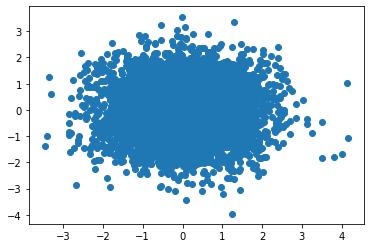

In [17]:
#2-c-i
mean = [0,0]
cov = np.identity(2)
print(cov)
sample = np.random.multivariate_normal(mean,cov,5000)
x,y = sample.T
plt.scatter(x,y)

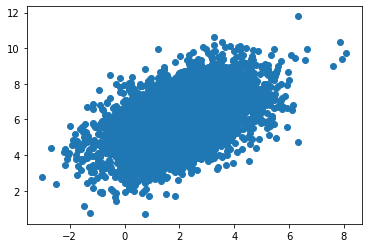

In [18]:
#2-c-ii
# from part b-iv, we know that b = [2, 6]'; A can be calculated through eigen decompostion
b = np.array([2,6])
A = np.array([[np.sqrt(6)/2, -1/np.sqrt(2)],[np.sqrt(6)/2, 1/np.sqrt(2)]])
Y = []
new_x, new_y = np.add(np.matmul(A,sample.T).T,b).T
plt.scatter(new_x,new_y)

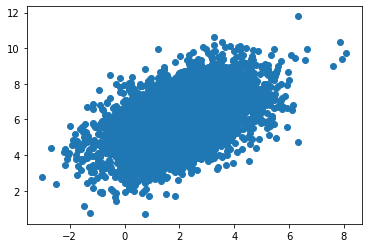

In [19]:
cov = np.array([[2,1],[1,2]])
b = np.array([2,6])
w,v = np.linalg.eig(cov)
dia =np.sqrt(np.diag(w))
trans = (v@dia)
x_check, y_check = np.add(np.matmul(trans,sample.T).T,b).T
plt.scatter(x_check,y_check)

#2-c-iii

The result from c(i) and (ii) support the theoretical dinding from part b, they are exactly the same.

# Exercise 3

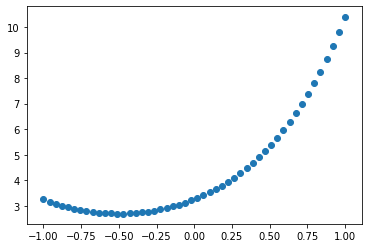

In [12]:
# 3-a
mu = 0
sig = 0.01
x = np.linspace(-1,1,50)
beta = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])
Ls = np.array([eval_legendre(x,0), eval_legendre(x,1), eval_legendre(x,2), eval_legendre(x,3), eval_legendre(x,4)])
err = np.random.normal(mu, sig, 1)
y = beta@Ls+err
fig,ax0 = plt.subplots()
ax0.scatter(x,y)


#3-b

$\hat{\beta}=\underset{\beta}{\mathrm{argmin}}||y-X\beta||^{2} =(y-X\beta)^{T}(y-X\beta)= (y^{T}-(X\beta)^{T})(y-X\beta)=y^{T}y -y^{T}X\beta -\beta^{T}x^{T}y+\beta^{T}X^{T}X\beta$

$\frac{\partial (y^{T}y -y^{T}X\beta -\beta^{T}x^{T}y+\beta^{T}X^{T}X\beta)}{\partial \beta} = -y^{T}x-x^{T}y+2\beta x^{T}x = 0$

$\beta = \frac{(y^{T}x+x^{T}y)(x^{T}x)^{-1}}{2}$


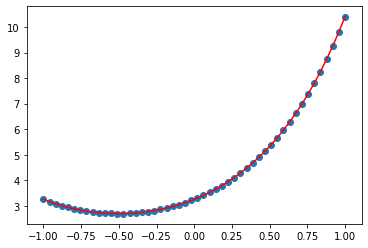

In [15]:
# 3-c
beta_fit = np.linalg.lstsq(Ls.T,y,rcond=None)[0]
new_y = Ls.T@beta_fit
fig,ax0 = plt.subplots()
ax0.scatter(x,y)
ax0.plot(x,new_y,color="r")

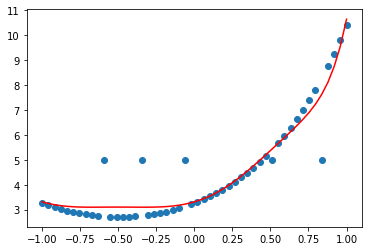

In [5]:
# 3-d
idx = [10, 16, 23, 37, 45]
new_y[idx] = 5
beta_fit_noise = np.linalg.lstsq(Ls.T,new_y,rcond=None)[0]
new_y_noise = Ls.T@beta_fit_noise
plt.scatter(x,new_y)
plt.plot(x,new_y_noise,color="r")

As we introduced those outliers into our system, we see that the regression line does not fit the data points as good as it is before.

#3-e 

$\hat{\beta}=\underset{\beta}{\mathrm{argmin}}||y-X\beta||_{1} = \underset{\beta}{\mathrm{argmin}}\sum_{n=1}^{N}|y_{n}-X_{n}^{T}\beta|$


Let's introduce $u = \begin{bmatrix}u_{1}\\u_{2} \\ \vdots \\ u_{n} \end{bmatrix}$

$u_{n}=|y_{n}-X_{n}^{T}\beta|$

$c^{T} = \begin{bmatrix}0 & 0 & \dots & 0 & 1 & 1 & \dots & 1  \end{bmatrix}$

$x = \begin{bmatrix}
\beta\\
u_{1}\\
u_{2}\\
\vdots\\
u_{n}
\end{bmatrix}$

restriction: $u_{n} \geq |y_{n}-X_{n}^{T}\beta|$

=> $y_{n} \geq X_{n}^{T}\beta-u_{n}$ & $-y_{n} \geq -X_{n}^{T}\beta-u_{n}$

Therefore, we have $A = \begin{bmatrix}
                        X_{1}^{T} & -1 & 0 & 0 & \dots & 0\\
                        X_{2}^{T} & 0 & -1 & 0 & \dots & 0\\
                        \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
                        X_{n}^{T} & 0 & 0 & 0 & \dots & -1\\
                        -X_{1}^{T} & -1 & 0 & 0 & \dots & 0\\
                        -X_{2}^{T} & 0 & -1 & 0 & \dots & 0\\
                        \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
                        -X_{n}^{T} & 0 & 0 & 0 & \dots & -1\\                    \end{bmatrix}$

b = $\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}\\
    -y_{1}\\
    -y_{2}\\
    \vdots\\
    -y_{n}\\
\end{bmatrix}$

In this problme, n = 50 since we have 50 data points

In [17]:
# 3-f
corrupt_data = np.array([new_y])

#creating vector c
c = np.append([0,0,0,0,0],np.ones(50))
X = np.array([eval_legendre(x,0), eval_legendre(x,1), eval_legendre(x,2), eval_legendre(x,3), eval_legendre(x,4)])

#creating matrix A
A = np.array(X.T)
roll_zero = np.array(np.zeros(50))
roll_zero[0]=-1
new_A=[]
for i in range(0,50):
    new_A.append(np.append(A[i],roll_zero))
    roll_zero = np.roll(roll_zero,1)
A_up=np.array(new_A)

A = -1*np.array(X.T)
roll_zero = np.array(np.zeros(50))
roll_zero[0]=-1
new_A=[]
for i in range(0,50):
    new_A.append(np.append(A[i],roll_zero))
    roll_zero = np.roll(roll_zero,1)
A_bottom = np.array(new_A)
A = np.vstack((A_up,A_bottom))

#creating vector b
b_up=corrupt_data.T
b_bottom=-1*b_up
b=np.vstack((b_up,b_bottom))

#solve
result=scipy.optimize.linprog(c,A,b,bounds=(None,None))


<ipython-input-17-25abe0a96026>:34: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  result=scipy.optimize.linprog(c,A,b,bounds=(None,None))
<ipython-input-17-25abe0a96026>:34: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  result=scipy.optimize.linprog(c,A,b,bounds=(None,None))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.32162e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimi

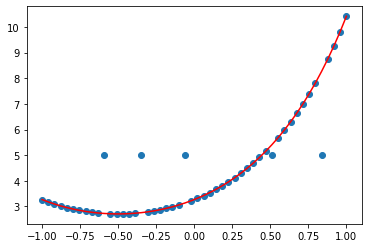

In [18]:
lp_beta = result.x[0:5]
new_y_lp = Ls.T@lp_beta
fig, ax2 = plt.subplots()
ax2.scatter(x,new_y)
ax2.plot(x,new_y_lp,color="r")